# Histogram equalization
---

Using the following algorithm, implement histogram equalization:

1. Calculate normalized histogram: Normalization is performed by dividing the frequency of each bin by the total number of pixels in the image.
2. Cumulative distribution function of the histogram: Find the cumulative sum of the normalized histogram:

    $\sum_{i=0}^j P_x(i)$

    Where $P_x$ is the normalized histogram.

3. Derive intensity-mapping lookup table: Map the new pixel intensities to each pixel of the image. For each discrete intensity level i, the mapped pixel value is calculated from the normalized cumulative histogram according to:

    ```mapped_pixel_value(i) = (L-1)*normalized_cumulative_histogram(i)```

    Where L = 256 for a typical 8-bit unsigned integer representation of pixel intensity.

4. Transform pixel intensity of the original image with the lookup table: Create a new image based on the lookup table.

In [84]:
import numpy as np
import cv2

import matplotlib.pyplot as plt

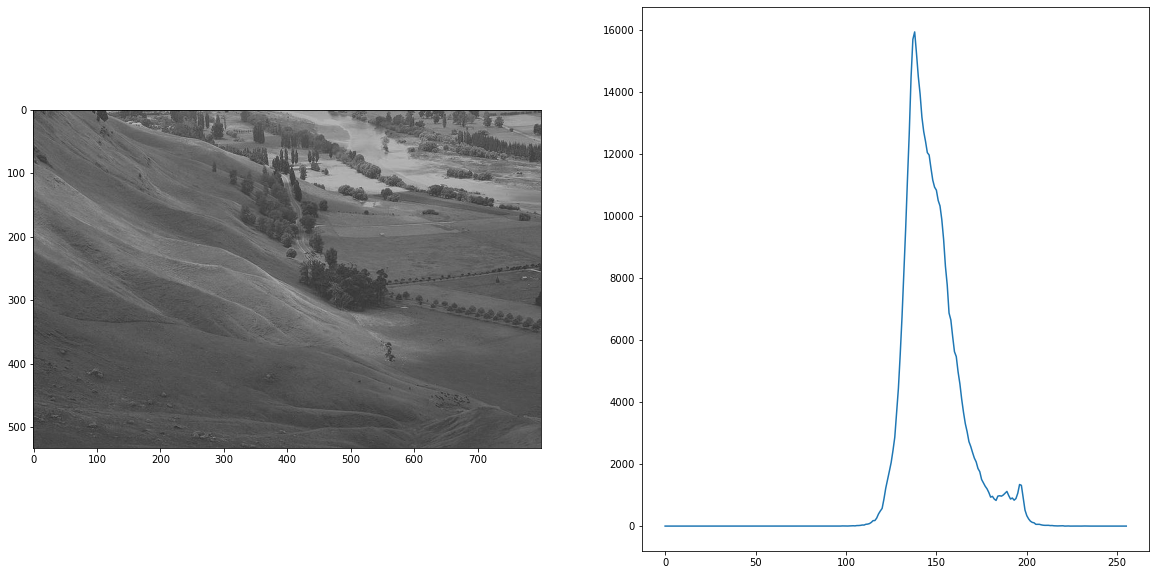

In [85]:
image = cv2.imread('images/Hawkes_Bay_NZ.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([image], [0], None, [256], [0, 256])

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(image, cmap='gray')
ax2.plot(hist)

In [86]:
# TODO: Implment all the functions needed to perform histogram equalization. Test your functions on the following image. Plot the image, the equalized version of the image, and the histograms of both the original and the equalized image.

def normalized_histogram(image):
    
    bins = 256
    histogram_values = [0]*bins
    
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            histogram_values[image[x][y]] += 1
    for i in range(bins):
        histogram_values[i] = histogram_values[i] / (image.shape[0] * image.shape[1])
    
    return histogram_values

histogram_values = normalized_histogram(image)

In [87]:
def cumulative_function(norm_hist):
    values = 256
    cumulative_values = [0]*values
    
    for i in range(0,256):
        if(i == 0):
            cumulative_values[0] = norm_hist[0]
        else:
            cumulative_values[i] = cumulative_values[i-1] + norm_hist[i]
    
    return cumulative_values

cumulative_distribution = cumulative_function(histogram_values)
    

In [88]:
def mapping_function(cdf):
    val = 256
    mapping_values = [0]*val

    for i in range(0, val):
        mapping_values[i] = (256-1) * cdf[i]
        
    return mapping_values

intensity_mapping = mapping_function(cumulative_distribution)    

In [89]:
def transform(mapeo, imagen):
    new_img = np.zeros((imagen.shape[0], imagen.shape[1]), dtype=np.uint8)

    for x in range(imagen.shape[0]):
        for y in range(imagen.shape[1]):
            new = imagen[x][y]
            new_img[x][y] = mapeo[new]
    return new_img

nueva_imagen = transform(intensity_mapping, image)

In [90]:
def hist_equalization(image):
    bins = 256
    histogram_values = [0]*bins
    
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            histogram_values[image[x][y]] += 1
    
    return histogram_values

hist_eq = hist_equalization(nueva_imagen)

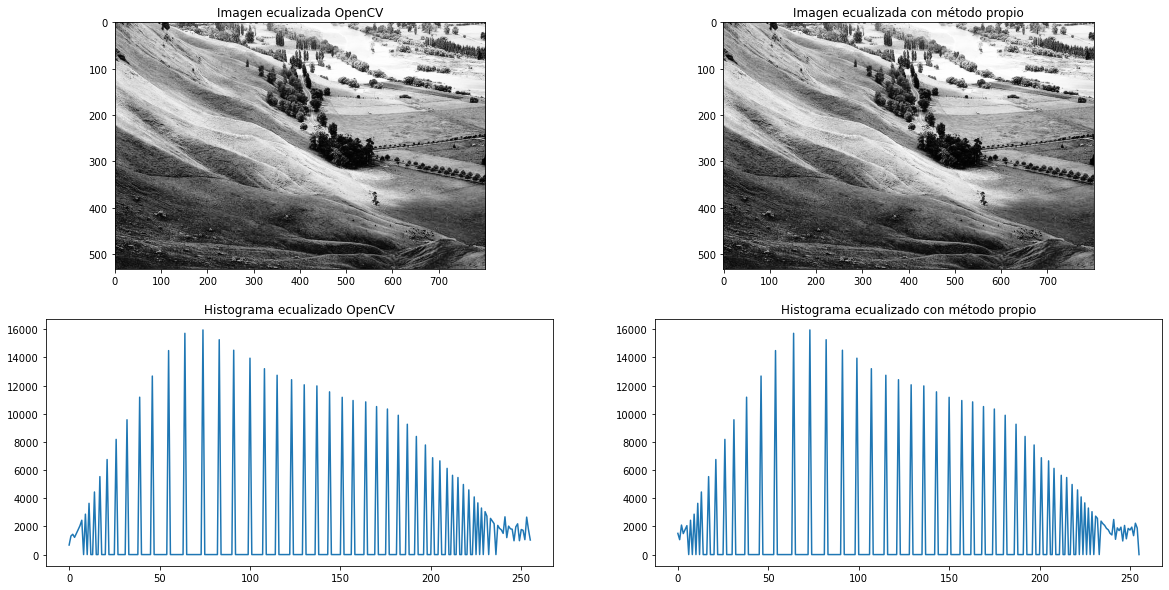

In [91]:
# TODO: Compare your results with the OpenCV implementation of histogram equalization. Plot the histogram of the equalized image with your implementation and the histogram of the equalized image with OpenCV's implementation.

eq = cv2.equalizeHist(image)
hist = cv2.calcHist([eq], [0], None, [256], [0, 256])

f, ((ax1,ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10))

ax1.set_title("Imagen ecualizada OpenCV")
ax1.imshow(eq, cmap='gray')

ax2.set_title("Imagen ecualizada con método propio")
ax2.imshow(nueva_imagen, cmap='gray')

ax3.set_title("Histograma ecualizado OpenCV")
ax3.plot(hist)

ax4.set_title("Histograma ecualizado con método propio")
ax4.plot(hist_eq)

In [92]:
def transform_image(mapeoR, mapeoG, mapeoB, image):
    new_img = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            new_img[x][y][0] = mapeoR[image[x][y][0]]
            new_img[x][y][1] = mapeoG[image[x][y][1]]
            new_img[x][y][2] = mapeoB[image[x][y][2]]

    return new_img

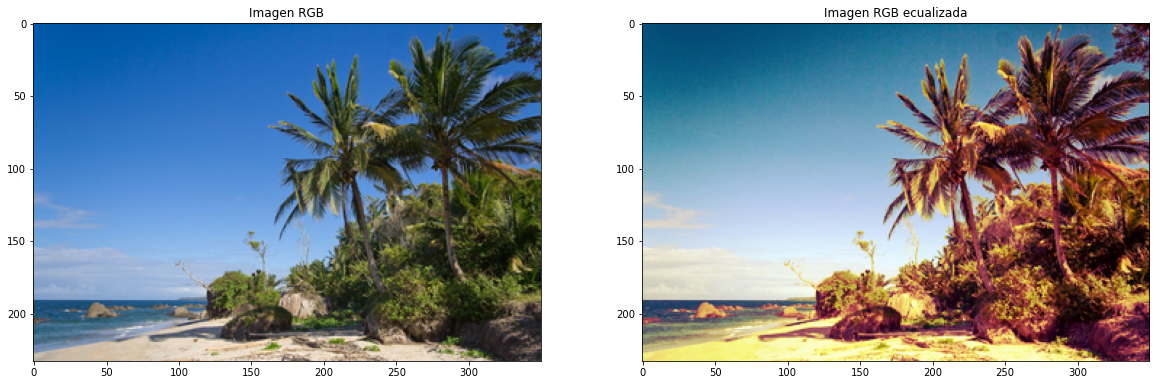

In [93]:
# TODO: Apply your function and do histogram equalization on a color image. Apply the equalization on an RGB image first. Then on the HSV version of the image. Plot a figure with each resulting image. NOTE: for Hue, the range of values goes from 0 to 180, while S and V, go from 0 to 255. 

image1 = cv2.imread('images/beach.png')

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

R, G, B = cv2.split(image1)

eq_R = normalized_histogram(R)
eq_R1 = cumulative_function(eq_R)
eq_R2 = mapping_function(eq_R1)

eq_G = normalized_histogram(G)
eq_G1 = cumulative_function(eq_G)
eq_G2 = mapping_function(eq_G1)

eq_B = normalized_histogram(B)
eq_B1 = cumulative_function(eq_B)
eq_B2 = mapping_function(eq_B1)

eq_rgb = transform_image(eq_R2, eq_G2, eq_B2, image1)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title("Imagen RGB")
ax1.imshow(image1, cmap="gray")

ax2.set_title("Imagen RGB ecualizada")
ax2.imshow(eq_rgb, cmap="gray")


In [94]:
def transform3Channel(mapeo, imagen,channel):
    new_img = np.zeros((imagen.shape[0], imagen.shape[1]), dtype=np.uint8)

    for x in range(imagen.shape[0]):
        for y in range(imagen.shape[1]):
            new = imagen[x][y][channel]
            new_img[x][y] = mapeo[new]
    return new_img

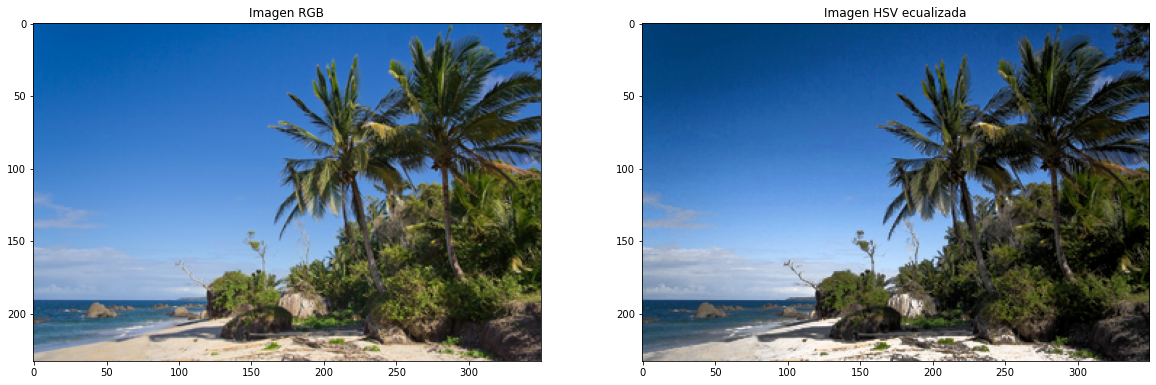

In [95]:
hsv = cv2.cvtColor(image1, cv2.COLOR_RGB2HSV)

H, S, V = cv2.split(hsv)

eq_S = normalized_histogram(S)
eq_S1 = cumulative_function(eq_S)
eq_S2 = mapping_function(eq_S1)
eq_S3 = transform3Channel(eq_S2, hsv,1)

eq_V = normalized_histogram(V)
eq_V1 = cumulative_function(eq_V)
eq_V2 = mapping_function(eq_V1)
eq_V3 = transform3Channel(eq_V2, hsv,2)

eq_hsv = cv2.merge((H, eq_S3, eq_V3))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title("Imagen RGB")
ax1.imshow(image1)

ax2.set_title("Imagen HSV ecualizada")
ax2.imshow(cv2.cvtColor(eq_hsv, cv2.COLOR_HSV2RGB))

Classifier loaded correctly


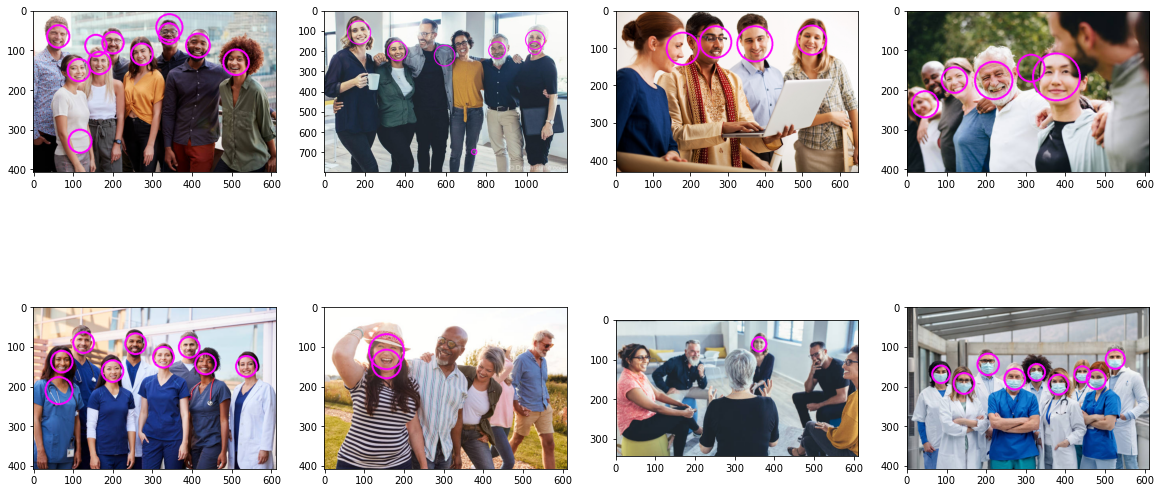

In [96]:
# TODO: For each of the images of people in the image folder, apply histogram equalization, and then detect faces with haar cascades. For each image, plot the result of the face detection without applying histogram equalization, and after applying histogram equalization. 

# Antes de ecualizar 

face_cascade = cv2.CascadeClassifier()
if not face_cascade.load('haar_cascades/haarcascade_frontalface_default.xml'):
    print("Error loading cascade classifier")
else:
    print("Classifier loaded correctly")

people_images = []
people_gray_images = []

f, ax = plt.subplots(2, 4, figsize=(20,10))

for i in range(8):
    people = cv2.imread(f'images/people/people{i+1}.jpg')

    people = cv2.cvtColor(people, cv2.COLOR_BGR2RGB)
    people_gray = cv2.cvtColor(people, cv2.COLOR_RGB2GRAY)

    people_images.append(people)
    people_gray_images.append(people_gray)

    faces = face_cascade.detectMultiScale(people_gray)

    for (x,y,w,h) in faces:
        center = (x + w//2, y + h//2)
        people_faces = cv2.ellipse(people, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)
        sub_face = people[y:y+h, x:x+w]
        people[y:y+sub_face.shape[0], x:x+sub_face.shape[1]] = sub_face

    col, row = i % 4, i // 4
    ax[row][col].imshow(people_images[i], cmap='gray')

Classifier loaded correctly


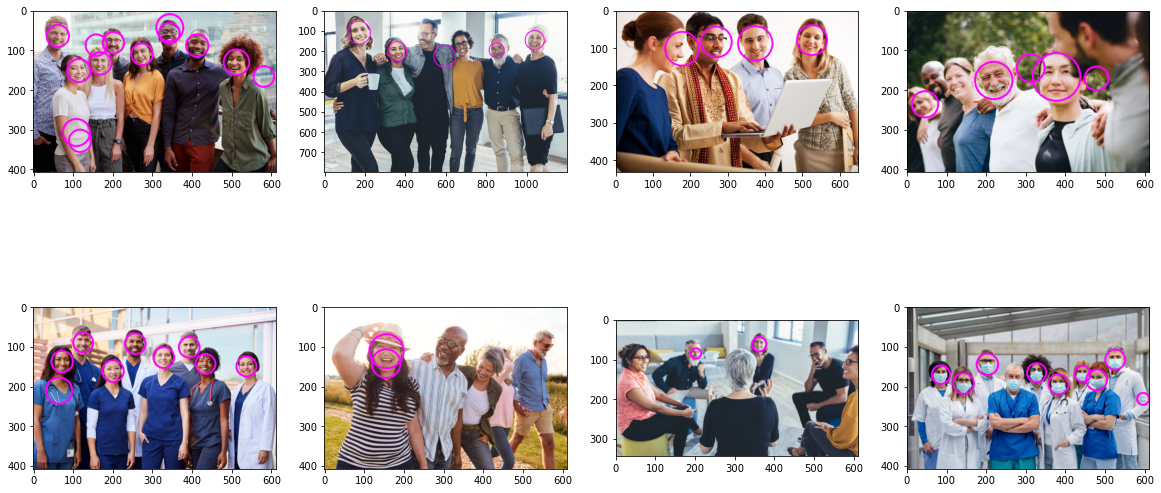

In [97]:
# Después de ecualizar 

face_cascade = cv2.CascadeClassifier()
if not face_cascade.load('haar_cascades/haarcascade_frontalface_default.xml'):
    print("Error loading cascade classifier")
else:
    print("Classifier loaded correctly")

people_images = []
people_gray_images = []

f, ax = plt.subplots(2, 4, figsize=(20,10))

for i in range(8):
    people = cv2.imread(f'images/people/people{i+1}.jpg')

    people = cv2.cvtColor(people, cv2.COLOR_BGR2RGB)
    people_gray = cv2.cvtColor(people, cv2.COLOR_RGB2GRAY)
    
    eq_R = normalized_histogram(people_gray)
    eq_R1 = cumulative_function(eq_R)
    eq_R2 = mapping_function(eq_R1)

    people_images.append(people)
    people_gray_images.append(transform(eq_R2,people_gray))

    faces = face_cascade.detectMultiScale(transform(eq_R2,people_gray))

    for (x,y,w,h) in faces:
        center = (x + w//2, y + h//2)
        people_faces = cv2.ellipse(people, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)
        sub_face = people[y:y+h, x:x+w]
        people[y:y+sub_face.shape[0], x:x+sub_face.shape[1]] = sub_face

    col, row = i % 4, i // 4
    ax[row][col].imshow(people_images[i], cmap='gray')